In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
file = './Dataset/combined_value_and_volume.csv'
df = pd.read_csv(file, index_col='Unnamed: 0')
df.head()

,Species,Geolocation,Value,Year,Quarter,Volume
0,Milkfish,National Capital Region (NCR),2.853500e+03,2020,Quarter 1,36.370000
1,Milkfish,Cordillera Administrative Region (CAR),3.503092e+04,2020,Quarter 1,351.713333
2,Milkfish,Region I (Ilocos Region),2.721046e+06,2020,Quarter 1,24495.360000
3,Milkfish,Region II (Cagayan Valley),1.623570e+03,2020,Quarter 1,12.950000
4,Milkfish,Region III (Central Luzon),1.159739e+06,2020,Quarter 1,10972.480000


# Univariate Analysis

As for univariate analysis, we can consider analyzing the content or unique values of each qualitative columns.

## Species

In [5]:
print(df['Species'].unique())
print(df['Species'].nunique())

['Milkfish' 'Tilapia' 'Tiger Prawn' 'Mudcrab' 'Endeavor Prawn'
 'White Shrimp' 'Grouper' 'Siganid' 'P. Vannamei' 'Spiny Lobster' 'Carp'
 'Catfish' 'Gourami' 'Mudfish' 'Freshwater Prawn' 'Others' 'Oyster'
 'Mussel' 'Seaweed']
19


Based in this set of species, we can see that we only have 19 unique species available in our dataset. This may not include species that are region specific (such as ...).

## Geolocation

In [6]:
print(df['Geolocation'].unique())
print(df['Geolocation'].nunique())

['National Capital Region (NCR)' 'Cordillera Administrative Region (CAR)'
 'Region I (Ilocos Region)' 'Region II (Cagayan Valley)'
 'Region III (Central Luzon)' 'Region IV-A (CALABARZON)' 'MIMAROPA Region'
 'Region V (Bicol Region)' 'Region VI (Western Visayas)'
 'Region VII (Central Visayas)' 'Region VIII (Eastern Visayas)'
 'Region IX (Zamboanga Peninsula)' 'Region X (Nothern Mindanao)'
 'Region XI (Davao Region)' 'Region XII (SOCCSKSARGEN)'
 'Region XIII (Caraga)'
 'Bangsamoro Autonomous Region in Muslim Mindanao (BARMM)']
17


As for geolocation, our group included all 17 regions in the Philippines.

## Volume

Since there aren't much variables to look around, we proceed with the bivariate analysis.

# Bivariate Analysis

## Species - Value

In [ ]:
filtered_df = df.groupby(['Species'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

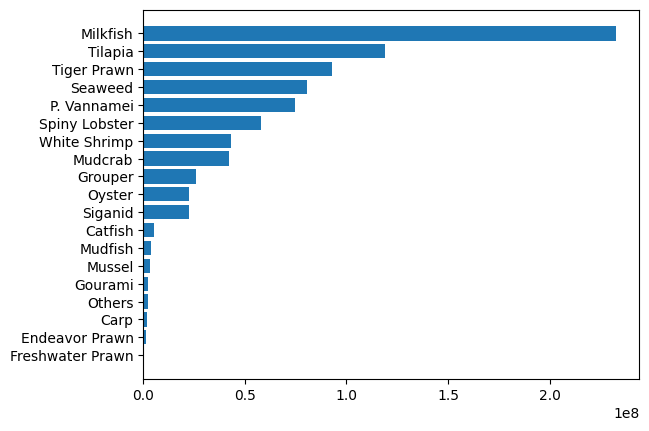

In [26]:
plt.barh(y=filtered_df['Species'], width=filtered_df['Value'], )
plt.show()

## Species - Volume

In [27]:
filtered_df = df.groupby(['Species'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

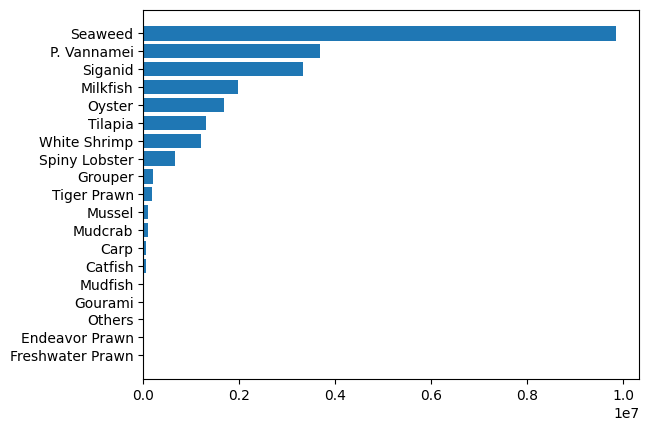

In [29]:
plt.barh(y=filtered_df['Species'], width=filtered_df['Volume'], )
plt.show()

## Geolocation - Value

In [30]:
filtered_df = df.groupby(['Geolocation'])['Value'].sum().reset_index().copy()

filtered_df.sort_values(by='Value', ascending=True, inplace=True)

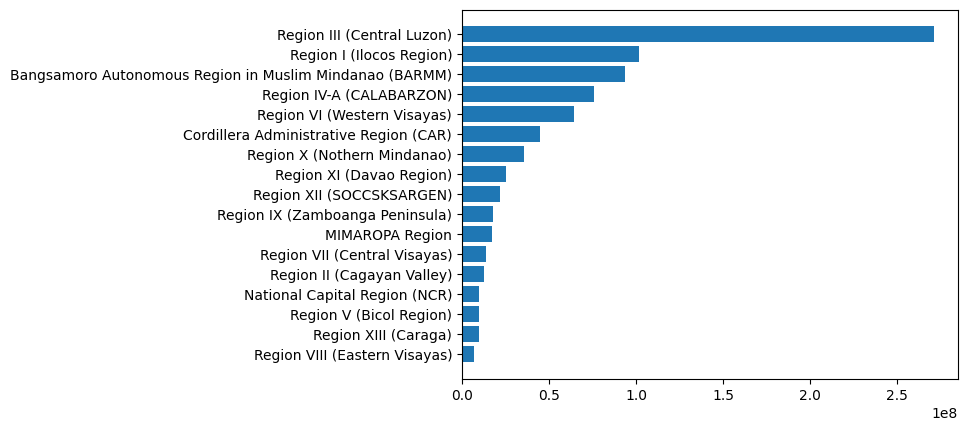

In [31]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Value'], )
plt.show()

## Geolocation - Volume

In [32]:
filtered_df = df.groupby(['Geolocation'])['Volume'].sum().reset_index().copy()

filtered_df.sort_values(by='Volume', ascending=True, inplace=True)

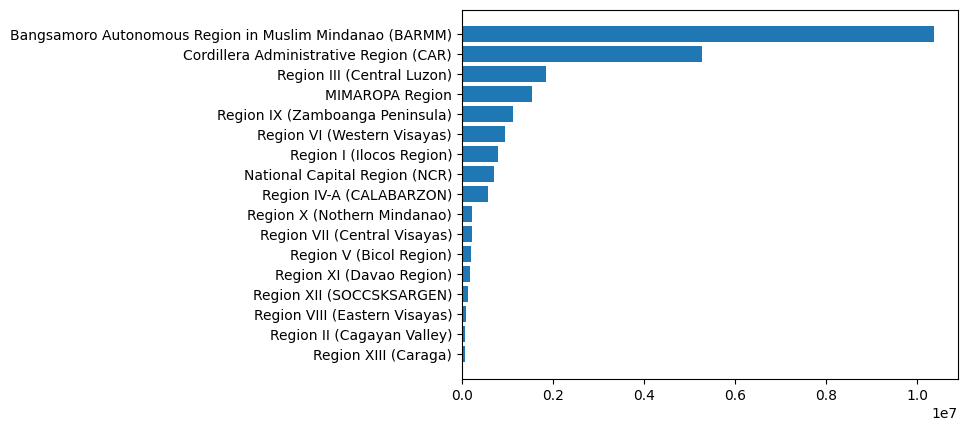

In [33]:
plt.barh(y=filtered_df['Geolocation'], width=filtered_df['Volume'], )
plt.show()

## Value - Year/Quarter

In [37]:
filtered_df = df.groupby(['Year', 'Quarter'])['Value'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

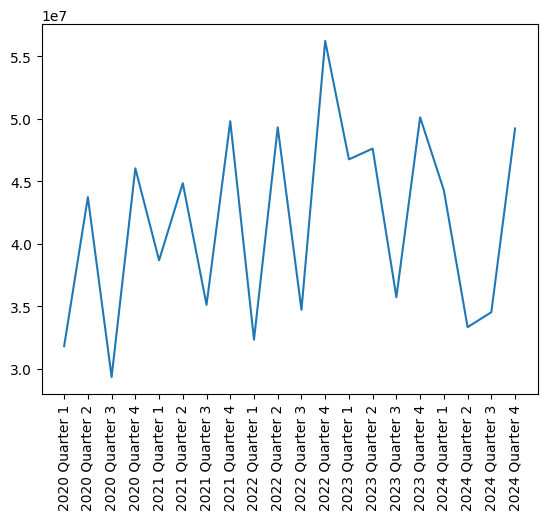

In [41]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Value'])
plt.xticks(rotation=90)
plt.show()

## Volume - Year/Quarter

In [42]:
filtered_df = df.groupby(['Year', 'Quarter'])['Volume'].sum().reset_index().copy()
filtered_df.sort_values(by=['Year', 'Quarter'], ascending=True, inplace=True)
filtered_df['Year-Quarter'] = filtered_df['Year'].astype(str)+filtered_df['Quarter']

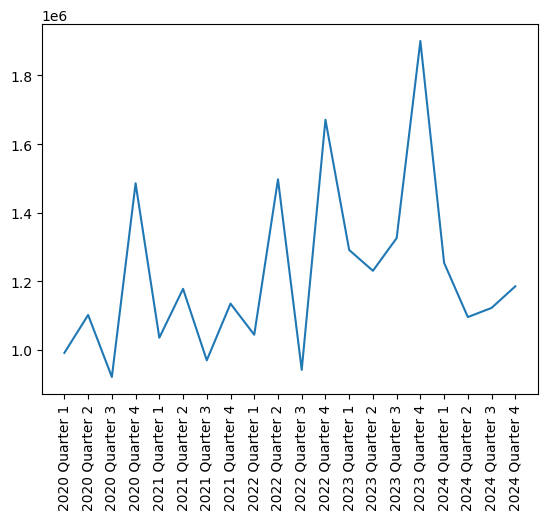

In [43]:
plt.plot(filtered_df['Year-Quarter'], filtered_df['Volume'])
plt.xticks(rotation=90)
plt.show()

## Value - Volume

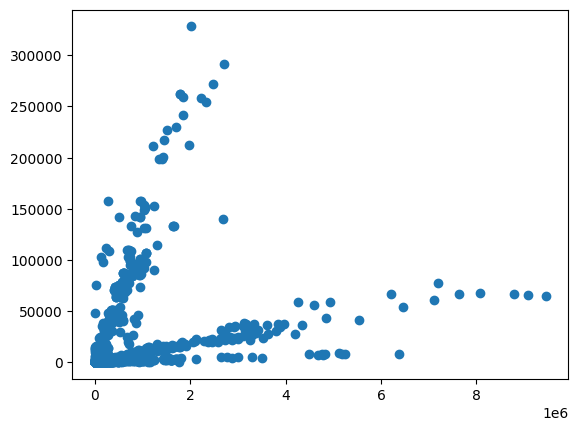

In [44]:
plt.scatter(df['Value'], df['Volume'])
plt.show()

# Multivariate Analysis

## Value - Year/Quarter per Species

## Value - Year/Quarter per Region

## Volume - Year/Quarter per Species

## Volume - Year/Quarter per Region